In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('train.csv')
df.head(5)

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

In [4]:
df['churn'].unique()

array(['no', 'yes'], dtype=object)

In [ ]:
plt.hist(df['churn'], bins=20 )
plt.show()

# number_vmail_messages and number_customer_service_call have outliers by this histogram

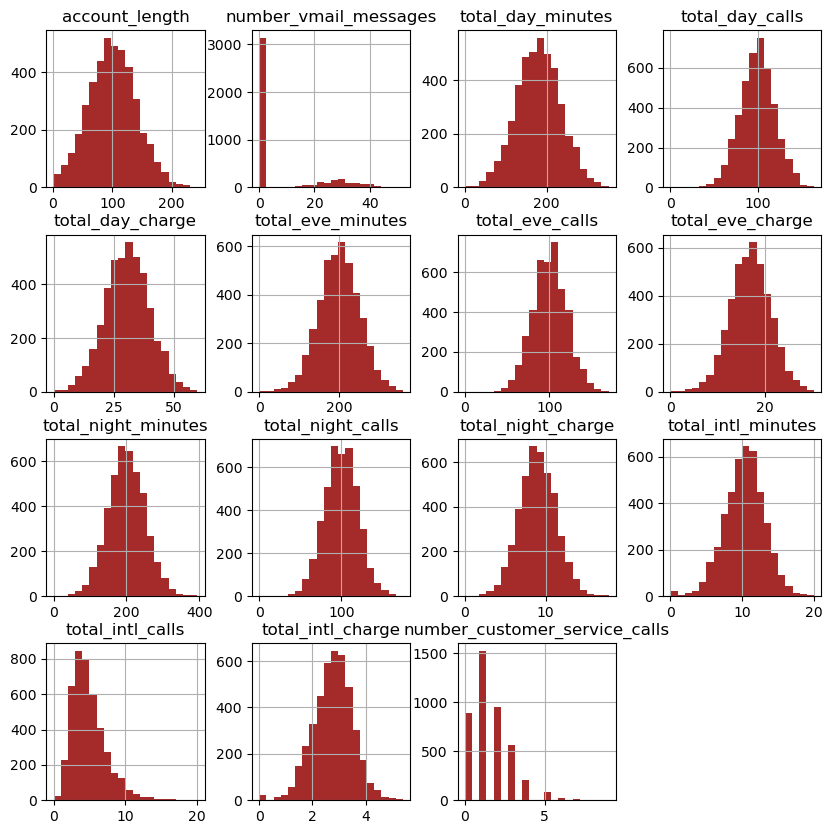

In [11]:
df.hist(figsize=(10,10), bins=20, color='brown')
plt.show()

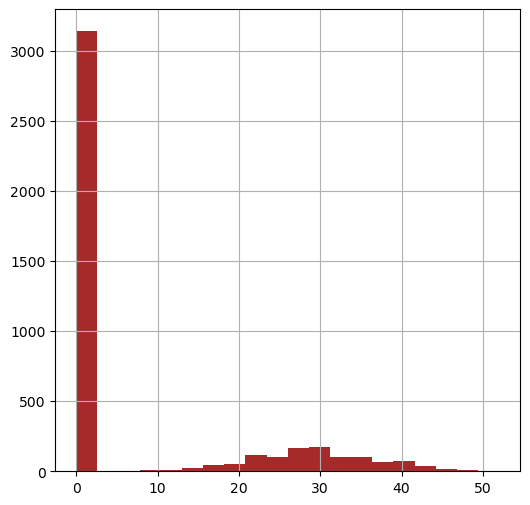

In [12]:
df['number_vmail_messages'].hist(figsize=(6,6), bins =20 , color='brown')
plt.show()

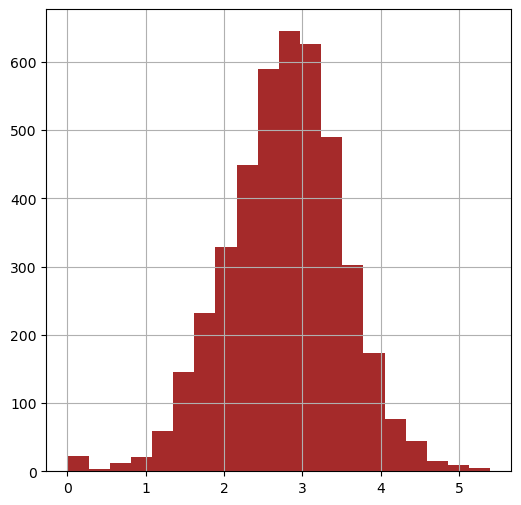

In [13]:
df['total_intl_charge'].hist(figsize=(6,6) , bins= 20 , color='brown')
plt.show()

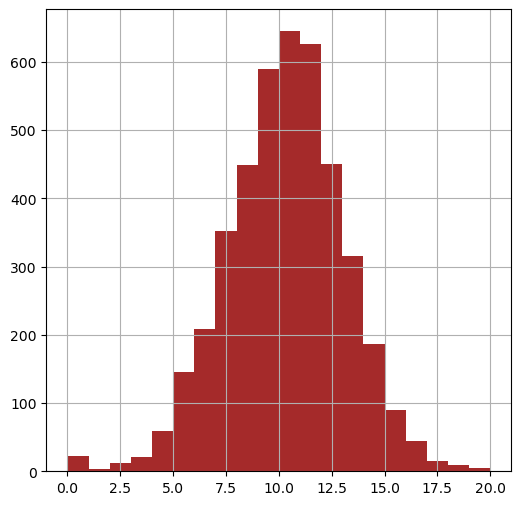

In [14]:
df['total_intl_minutes'].hist(figsize=(6,6) , bins= 20 , color='brown')
plt.show()

# to ensure should i delete or not , i check the correlation between number_vmail_messages and target column

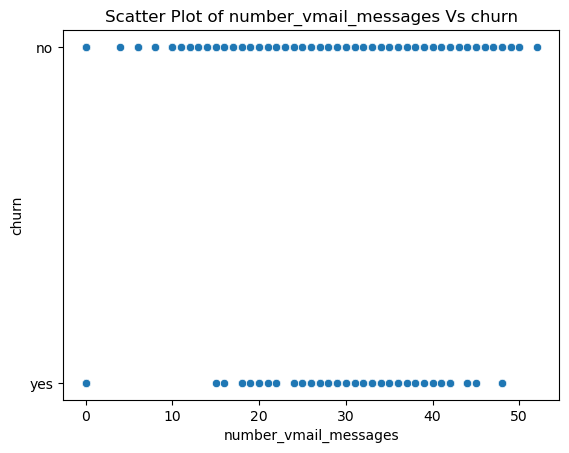

In [17]:
sns.scatterplot(x=df['number_vmail_messages'], y=df['churn'] ,data=df)
plt.title('Scatter Plot of number_vmail_messages Vs churn')
plt.show()

In [19]:
df['churn_class_encoded'] = df['churn'].apply(lambda x: 1 if x == 'yes' else 0)
corr = df['churn_class_encoded'].corr(df['number_vmail_messages'])
print(corr)


-0.1003465278887836


#By this scatter plot and correlation , i assume i can drop this column

In [20]:
df.drop(columns=['number_vmail_messages'],inplace=True)

0.22122027213513526


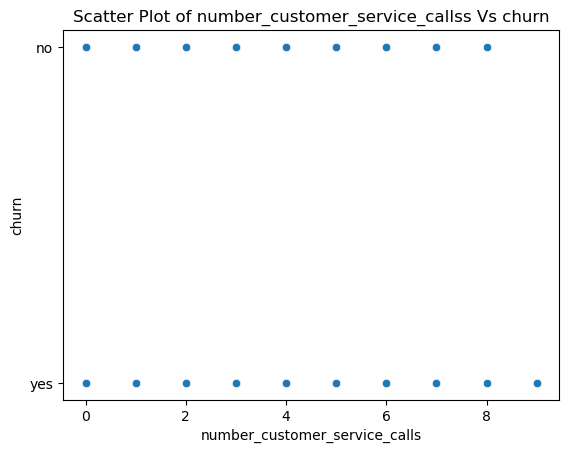

In [24]:
corr = df['churn_class_encoded'].corr(df['number_customer_service_calls'])
print(corr)
sns.scatterplot(x=df['number_customer_service_calls'], y=df['churn'] ,data=df)
plt.title('Scatter Plot of number_customer_service_callss Vs churn')
plt.show()

# i assume i can also drop this column

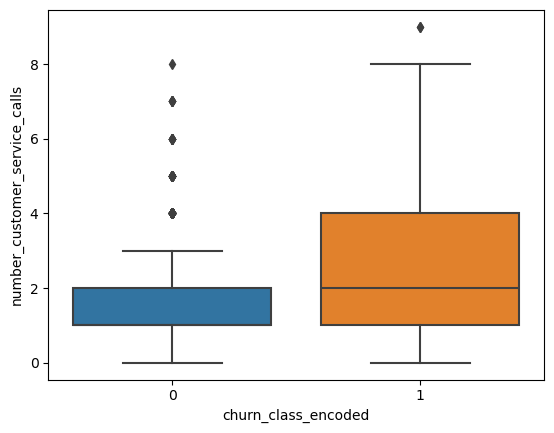

In [25]:
sns.boxplot(x=df['churn_class_encoded'], y=df['number_customer_service_calls'], data=df)
plt.show()


In [30]:
df.drop(columns=['number_customer_service_calls'],inplace=True)

# Every column does not correlate too much . so i assume it is okay

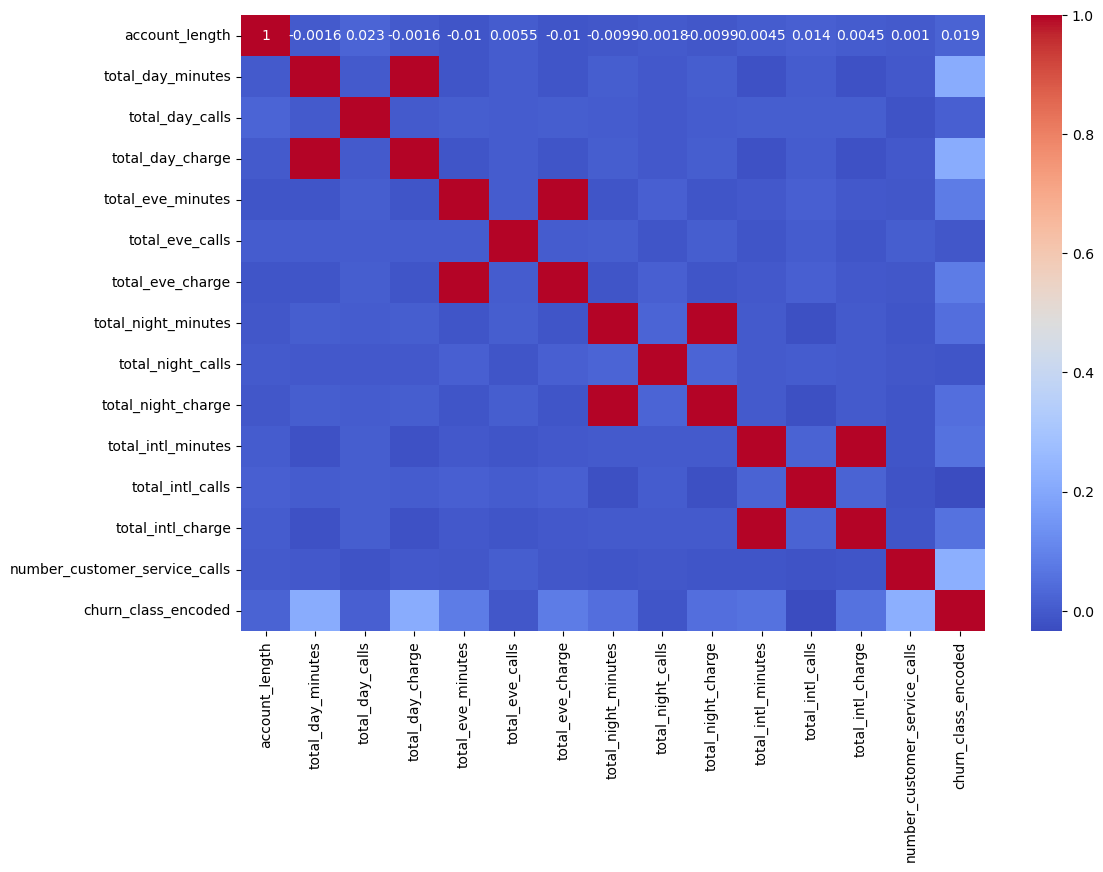

In [29]:
df_non_object = df.select_dtypes(exclude=['object'])
corr_matrix = df_non_object.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

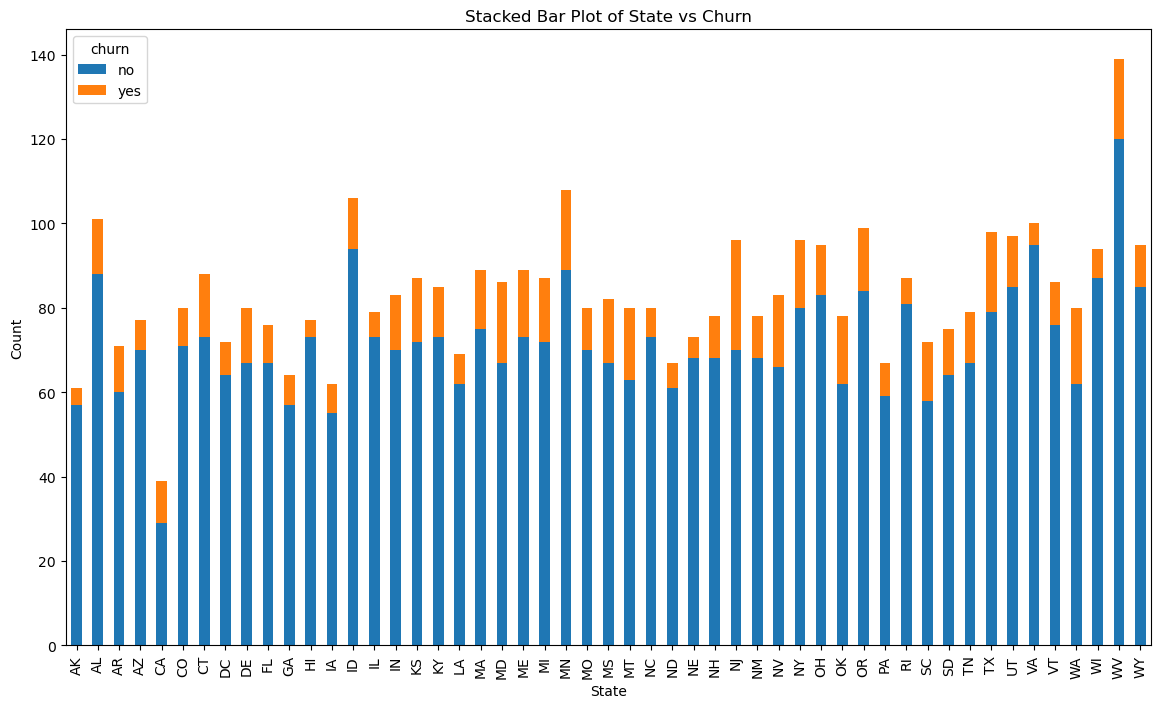

In [35]:
state_churn = df.groupby(['state', 'churn']).size().unstack()
state_churn.plot(kind='bar', stacked=True, figsize=(14, 8))
plt.title('Stacked Bar Plot of State vs Churn')
plt.xlabel('State')
plt.ylabel('Count')
plt.show()

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   state                4250 non-null   object 
 1   account_length       4250 non-null   int64  
 2   area_code            4250 non-null   object 
 3   international_plan   4250 non-null   object 
 4   voice_mail_plan      4250 non-null   object 
 5   total_day_minutes    4250 non-null   float64
 6   total_day_calls      4250 non-null   int64  
 7   total_day_charge     4250 non-null   float64
 8   total_eve_minutes    4250 non-null   float64
 9   total_eve_calls      4250 non-null   int64  
 10  total_eve_charge     4250 non-null   float64
 11  total_night_minutes  4250 non-null   float64
 12  total_night_calls    4250 non-null   int64  
 13  total_night_charge   4250 non-null   float64
 14  total_intl_minutes   4250 non-null   float64
 15  total_intl_calls     4250 non-null   i

In [45]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['state'] = label_encoder.fit_transform(df['state'])
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   state                4250 non-null   int32  
 1   account_length       4250 non-null   int64  
 2   area_code            4250 non-null   object 
 3   international_plan   4250 non-null   object 
 4   voice_mail_plan      4250 non-null   object 
 5   total_day_minutes    4250 non-null   float64
 6   total_day_calls      4250 non-null   int64  
 7   total_day_charge     4250 non-null   float64
 8   total_eve_minutes    4250 non-null   float64
 9   total_eve_calls      4250 non-null   int64  
 10  total_eve_charge     4250 non-null   float64
 11  total_night_minutes  4250 non-null   float64
 12  total_night_calls    4250 non-null   int64  
 13  total_night_charge   4250 non-null   float64
 14  total_intl_minutes   4250 non-null   float64
 15  total_intl_calls     4250 non-null   i

In [47]:
df['area_code'] = label_encoder.fit_transform(df['area_code'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   state                4250 non-null   int32  
 1   account_length       4250 non-null   int64  
 2   area_code            4250 non-null   int32  
 3   international_plan   4250 non-null   object 
 4   voice_mail_plan      4250 non-null   object 
 5   total_day_minutes    4250 non-null   float64
 6   total_day_calls      4250 non-null   int64  
 7   total_day_charge     4250 non-null   float64
 8   total_eve_minutes    4250 non-null   float64
 9   total_eve_calls      4250 non-null   int64  
 10  total_eve_charge     4250 non-null   float64
 11  total_night_minutes  4250 non-null   float64
 12  total_night_calls    4250 non-null   int64  
 13  total_night_charge   4250 non-null   float64
 14  total_intl_minutes   4250 non-null   float64
 15  total_intl_calls     4250 non-null   i

In [48]:
df['international_plan'] = label_encoder.fit_transform(df['international_plan'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   state                4250 non-null   int32  
 1   account_length       4250 non-null   int64  
 2   area_code            4250 non-null   int32  
 3   international_plan   4250 non-null   int32  
 4   voice_mail_plan      4250 non-null   object 
 5   total_day_minutes    4250 non-null   float64
 6   total_day_calls      4250 non-null   int64  
 7   total_day_charge     4250 non-null   float64
 8   total_eve_minutes    4250 non-null   float64
 9   total_eve_calls      4250 non-null   int64  
 10  total_eve_charge     4250 non-null   float64
 11  total_night_minutes  4250 non-null   float64
 12  total_night_calls    4250 non-null   int64  
 13  total_night_charge   4250 non-null   float64
 14  total_intl_minutes   4250 non-null   float64
 15  total_intl_calls     4250 non-null   i

In [49]:
df['voice_mail_plan'] = label_encoder.fit_transform(df['voice_mail_plan'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   state                4250 non-null   int32  
 1   account_length       4250 non-null   int64  
 2   area_code            4250 non-null   int32  
 3   international_plan   4250 non-null   int32  
 4   voice_mail_plan      4250 non-null   int32  
 5   total_day_minutes    4250 non-null   float64
 6   total_day_calls      4250 non-null   int64  
 7   total_day_charge     4250 non-null   float64
 8   total_eve_minutes    4250 non-null   float64
 9   total_eve_calls      4250 non-null   int64  
 10  total_eve_charge     4250 non-null   float64
 11  total_night_minutes  4250 non-null   float64
 12  total_night_calls    4250 non-null   int64  
 13  total_night_charge   4250 non-null   float64
 14  total_intl_minutes   4250 non-null   float64
 15  total_intl_calls     4250 non-null   i

In [50]:
df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,churn,churn_class_encoded
0,35,107,1,0,1,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,no,0
1,31,137,1,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,no,0
2,35,84,0,1,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,no,0
3,36,75,1,1,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,no,0
4,19,121,2,0,1,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,no,0


In [51]:
df.drop(columns=['churn'],inplace=True)

In [52]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

columns_to_scale = df.columns.difference(['churn_class_encoded'])

df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

In [53]:
df.head(5)

,state,account_length,area_code,international_plan,voice_mail_plan,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,churn_class_encoded
0,0.70,0.438017,0.5,0.0,1.0,0.459744,0.745455,0.459672,0.544114,0.605882,0.544204,0.644051,0.588571,0.644344,0.685,0.15,0.685185,0
1,0.62,0.561983,0.5,0.0,0.0,0.692461,0.690909,0.692436,0.337323,0.647059,0.337263,0.411646,0.594286,0.411930,0.610,0.25,0.609259,0
2,0.70,0.342975,0.0,1.0,0.0,0.851778,0.430303,0.851740,0.172279,0.517647,0.172233,0.498481,0.508571,0.498593,0.330,0.35,0.329630,0
3,0.72,0.305785,0.5,1.0,0.0,0.474253,0.684848,0.474230,0.412747,0.717647,0.412901,0.473165,0.691429,0.473270,0.505,0.15,0.505556,0
4,0.38,0.495868,1.0,0.0,1.0,0.620768,0.533333,0.620649,0.969942,0.635294,0.969876,0.538228,0.674286,0.538548,0.375,0.35,0.375926,0


In [54]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


X = df.drop('churn_class_encoded', axis=1) 
y = df['churn_class_encoded'] 


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LogisticRegression()

model.fit(X_train, y_train)


y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(Accuracy: accuracy)
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


Accuracy: 0.8658823529411764
Confusion Matrix:
[[714   7]
 [107  22]]
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.99      0.93       721
           1       0.76      0.17      0.28       129

    accuracy                           0.87       850
   macro avg       0.81      0.58      0.60       850
weighted avg       0.85      0.87      0.83       850

